<a href="https://colab.research.google.com/github/niranjantdesai/bayesian-learning/blob/master/monte_carlo_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo dropout
Source: Yarin Gal's [demo](https://colab.research.google.com/drive/1zcOYplMmun83cL59G1VA4G8HuJAU_neF) from MLSS Moscow 2019.

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout

inputs = Input(shape=(1,))
x = Dense(512, activation="relu")(inputs)
# Dropout will be performed during inference too because the "training" flag is
# set to true.
x = Dropout(0.5)(x, training=True)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x, training=True)
outputs = Dense(1)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(loss="mean_squared_error", optimizer="adam")

In [2]:
import numpy as np

# Train data is between -3.8 and 3.8.
max_abs_val = 3.8
train_size = 20
# x_train = np.linspace(0, 1, train_size)
# x_train = max_abs_val * (x_train * 2 - 1)
x_train = np.random.uniform(-4, 4, size=train_size)
noise = np.random.normal(0, 3, size=train_size)
y_train = x_train ** 3 + noise

model.fit(x_train, y_train, epochs=2000, verbose=0)

In [0]:
import matplotlib.pyplot as plt

# Test data is between -10 and 10.
x_test = np.linspace(0, 1, 100)
x_test = x_test * 20 - 10

# do stochastic forward passes on x_test:
samples = [model.predict(x_test) for _ in range(500)]
m = np.mean(samples, axis=0).flatten() # predictive mean
v = np.var(samples, axis=0).flatten() # predictive variance

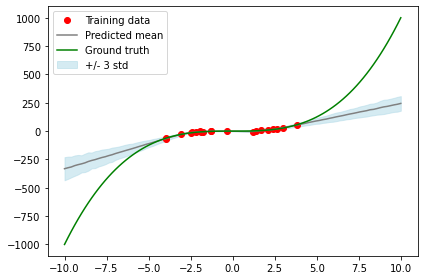

In [4]:
# plot mean and uncertainty
plt.plot(x_train, y_train, 'or', label='Training data')
plt.plot(x_test, m, 'gray', label='Predicted mean')
plt.plot(x_test, x_test ** 3, 'green', label='Ground truth')
plt.fill_between(x_test, m - 3*v**0.5, m + 3*v**0.5, 
                 color='lightblue', alpha=0.5, label='+/- 3 std') # plot three std
plt.legend()
plt.tight_layout()
plt.show()

We observe that the model predicts high uncertainties for points far away from the training data. The further the point from the training data, the higher the uncertainty.

This technique is called [Monte Carlo dropout](https://arxiv.org/pdf/1506.02142.pdf) and it can be used to estimate epistemic uncertainty (also known as model uncertainty) of predictions.